# Objective : To predict the ideal prices of the houses based on their characteristics using a regression alogrithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings (action = 'ignore')
plt.style.use (['seaborn-bright' , 'dark_background'])

In [2]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [4]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [5]:
# Note : The seaborn library has the capability to ignore the missing values and create the box plots easily,
#        while matplotlib library doesn't have this capability

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

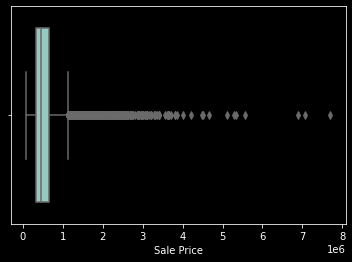

In [7]:
sns.boxplot (x = data['Sale Price'])

In [8]:
# Treating outlier with imputing method
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)

In [9]:
# iqr is inter quantile region
iqr = q3 - q1
iqr

323050.0

In [10]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit , lower_limit

(1129575.0, -162625.0)

In [11]:
def limit_imputer (value) :
    if value > upper_limit :
        return upper_limit
    if value < lower_limit :
        return lower_limit
    else :
        return value

In [12]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [13]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [14]:
data.dropna(inplace = True , axis = 0 , subset = ['Sale Price'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

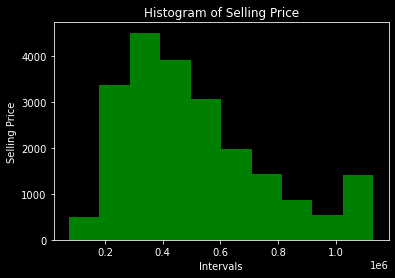

In [16]:
plt.hist(data['Sale Price'] , bins = 10 , color = 'green')
plt.xlabel('Intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of Selling Price')
plt.show()

In [17]:
numerical_column = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                   'Area of the House from Basement (in Sqft)', 'Latitude',
                   'Longitude','Living Area after Renovation (in Sqft)']

In [18]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan , strategy = 'median')
data[numerical_column] = imputer.fit_transform(data[numerical_column])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [20]:
# zipcode is a categorical variable
column = data['Zipcode'].values.reshape(-1 , 1)
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [22]:
mapping = {'None' : '0',
           'Once' : '1',
           'Twice': '2',
           'Thrice': '3',
           'Four' : '4'}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [23]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [24]:
# The two variables to be derived from the variable 'Renovated Year' :
# 1. Ever Renovated
# 2. Years since renovation
# The numpy.where() function return the indicies of elements in an input array where the array where the gives condition is satisfied
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0 , "No" , "Yes")


In [25]:
# Years since Renovation = Year of Sale - Year of Renovation
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [26]:
data['Years since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                         abs(data['Purchase Year'] - 
                                            data['Renovated Year']) , 0)

In [27]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [28]:
data.drop(columns = ['Purchase Year' , 'Date House was Sold' , 'Renovated Year'], inplace = True)

In [29]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [30]:
data.drop(columns = ['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.346928,0.148083,-0.409515,-0.326307,-0.071016,0.203375


In [31]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [32]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

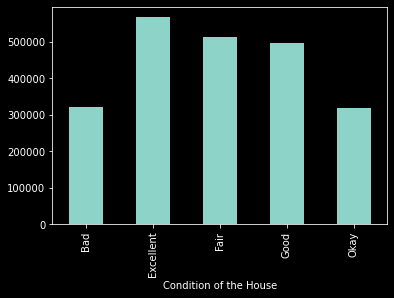

In [33]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Condition of the House'>

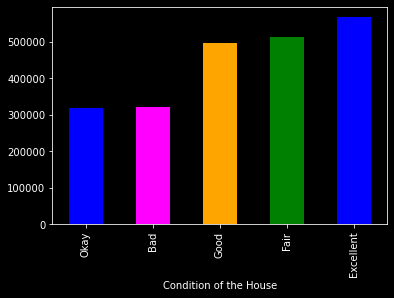

In [34]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar' , color = ['blue' , 'magenta', 'orange' , 'green'])

<AxesSubplot:xlabel='Waterfront View'>

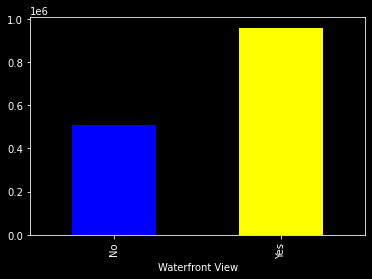

In [35]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar' , color = ['Blue' , 'Yellow'])

<AxesSubplot:xlabel='Zipcode'>

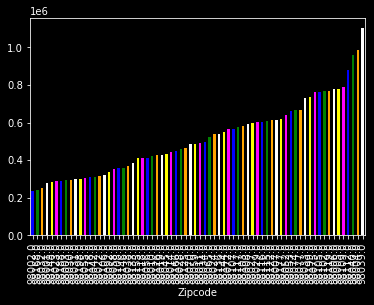

In [36]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar' , color = ['Blue' , "Green" , "Orange" , "White" , "Yellow" , "Magenta"])

In [37]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [38]:
# In python, variable names should not have spaces 
# A blank space can be removed using the 'rename' function

data = data.rename(columns = {'Sale Price' : 'Sale_Price',
                                             'Condition of the House' : 'Condition_of_the_House',
                                             'Ever Renovated' : 'Ever_Renovated',
                                             'Waterfront View' : 'Waterfront_View'})

In [39]:
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [40]:
mod = ols('Sale_Price ~ Waterfront_View', data = data).fit()
Annova_Table = sm.stats.anova_lm(mod , typ = 2)
print(Annova_Table)

                       sum_sq       df           F         PR(>F)
Waterfront_View  3.283737e+13      1.0  538.192683  1.275558e-117
Residual         1.318333e+15  21607.0         NaN            NaN


In [41]:
mod = ols('Sale_Price ~ Ever_Renovated', data = data).fit()
sm.stats.anova_lm(mod , typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [42]:
mod = ols('Sale_Price ~ Zipcode', data = data).fit()
sm.stats.anova_lm(mod , typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [43]:
# Add Condition_of_the_House also in this .... 
data = pd.get_dummies(data,
                  columns = ['Condition_of_the_House', 'Ever_Renovated', 'Waterfront_View'],
                 drop_first = True)

In [44]:
data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


# Splitting of Data into Train and Test Datasets

In [45]:
data_y = data.iloc[:,0]

In [46]:
data_x = data.iloc[:,1:31]

In [47]:
from sklearn.model_selection import train_test_split as tts

In [48]:
x_train , x_test , y_train , y_test = tts(data_x , data_y , test_size = 0.2 , random_state = 51)

In [49]:
# Dependent variables (Y) -> 'Sale_Price'
# Independent variable (X) -> 'Other Stuff'
X = data.drop(columns = ['Sale_Price'])
Y = data['Sale_Price']

In [50]:
train_x , test_x , train_y, test_y = tts(X , Y , test_size = 0.3 , random_state = 51)
train_x.shape , x_train.shape

((15126, 23), (17287, 23))

# Standardisation

In [51]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [52]:
x_test = scale.fit_transform(x_test)
x_test

array([[ 0.08217575,  0.67680171,  0.84533066, ..., -0.08360471,
        -0.20234654, -0.08075102],
       [-0.63187819,  1.76990222,  0.52132223, ..., -0.08360471,
        -0.20234654, -0.08075102],
       [ 1.61171175,  0.67680171,  0.19731379, ..., -0.08360471,
         4.94201674, -0.08075102],
       ...,
       [ 0.39457435, -0.41629881,  0.19731379, ..., -0.08360471,
        -0.20234654, -0.08075102],
       [ 2.52284053, -0.41629881,  1.81735597, ..., -0.08360471,
        -0.20234654, -0.08075102],
       [-0.48176458,  0.67680171,  0.52132223, ..., -0.08360471,
        -0.20234654, -0.08075102]])

In [53]:
x_train = scale.fit_transform(x_train)
x_train

array([[-0.92728692, -0.3944422 , -1.45385186, ..., -0.09100713,
        -0.21207005, -0.08871754],
       [-0.44468805, -0.3944422 , -0.80420051, ..., -0.09100713,
        -0.21207005, -0.08871754],
       [-0.07008612,  1.74778912,  1.46957923, ..., -0.09100713,
        -0.21207005, -0.08871754],
       ...,
       [-0.09001176, -0.3944422 ,  0.17027652, ..., -0.09100713,
        -0.21207005, -0.08871754],
       [-0.95876943,  0.67667346,  0.4951022 , ..., -0.09100713,
        -0.21207005, -0.08871754],
       [ 0.77675335,  0.67667346,  2.44405626, ..., -0.09100713,
        -0.21207005, -0.08871754]])

# Linear Regression

In [54]:
# This is the simplest prediction model
# It predics sale price for every house
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

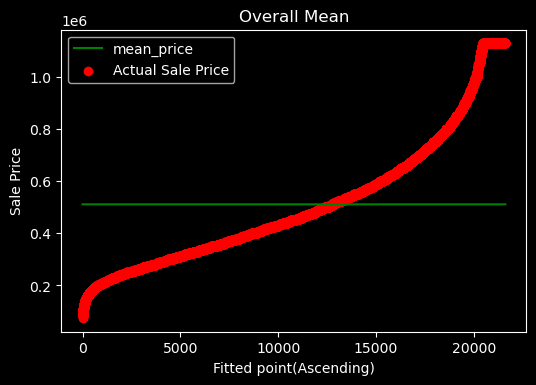

In [55]:
plt.figure(dpi = 100)
k = range(0 , len(data))
plt.scatter(k , data['Sale_Price'].sort_values() , color = 'red' , label = 'Actual Sale Price')
plt.plot(k , data['mean_sales'].sort_values() , color = 'green' , label = 'mean_price')
plt.xlabel('Fitted point(Ascending)')
plt.ylabel('Sale Price')
plt.title("Overall Mean")
plt.legend()

# Gradient Descent

In [56]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price' : sale_price,
                            'flat_area' : flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [67]:
# Step 1: Random Initialization
def param_init(Y):
    '''
    Y = target variable 
    returns initialized values of m and c
    '''
    m = 0.1 
    c = Y.mean()
    return m , c

In [68]:
#Step 2 : Generate Predictions 
def generate_predictions(m, c, X):
  '''
  X = independent variable
  returns prediction generated by line with parameters m, c
  '''
  prediction = []
  for x in X:
    pred = (m * x) + c
    prediction.append(pred)
  return prediction

In [69]:
#Step 3 : Calculating Cost
def compute_cost(prediction, Y):
  '''
  returns the mean_squared_error between prediction and Y
  '''
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

In [70]:
# Step 4 : Updating Parameters 
#(i) Calculating the gradients 
#(ii) Using the gradients to update the parameters m and c
def gradients (prediction , Y , X):
    '''
    Returns Gradients corresponding to m and c
    '''
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y)*X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm , Gc

In [71]:
def param_update(m_old , c_old , Gm_old , Gc_old , alpha):
    '''
    Update and return the new values of m and c
    '''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old 
    return m_new , c_new

In [72]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
  if i < max_iter - 1 :
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')
  
  ## plotting the final result
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

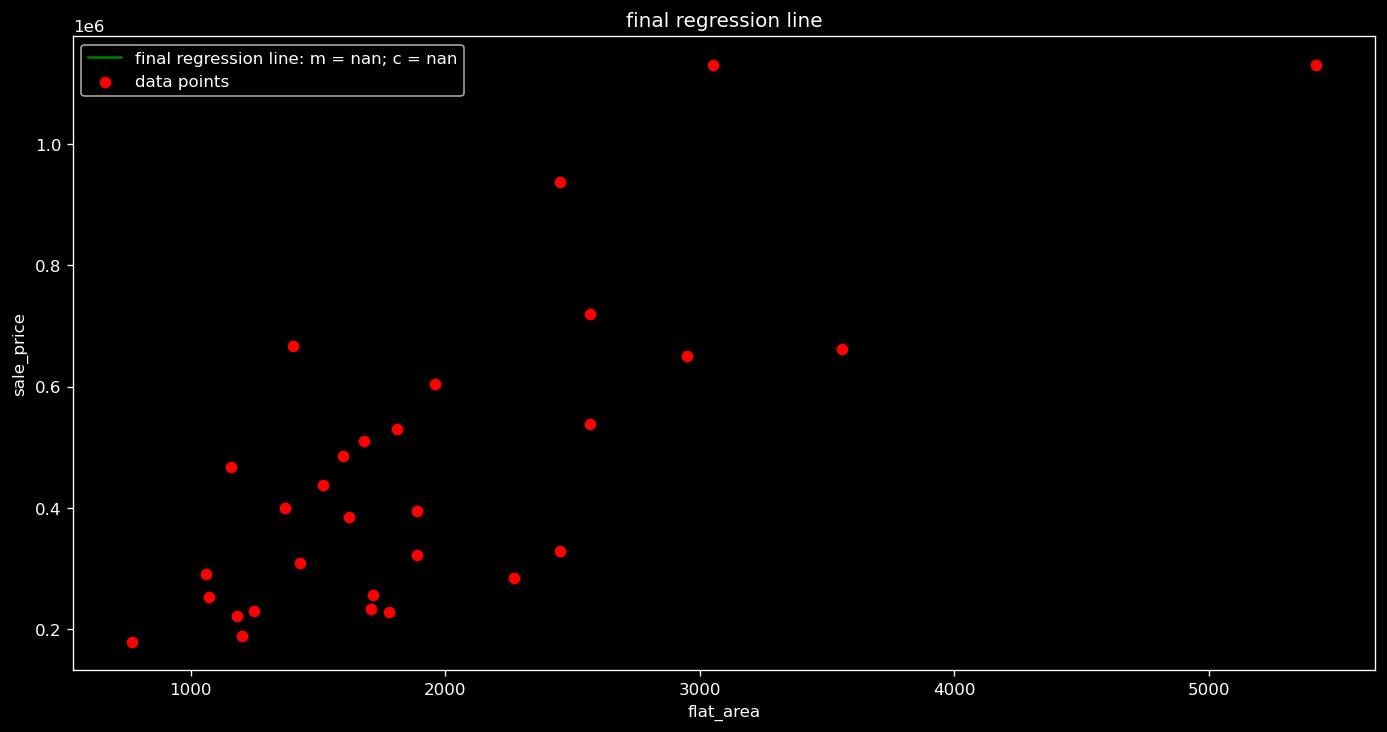

In [73]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

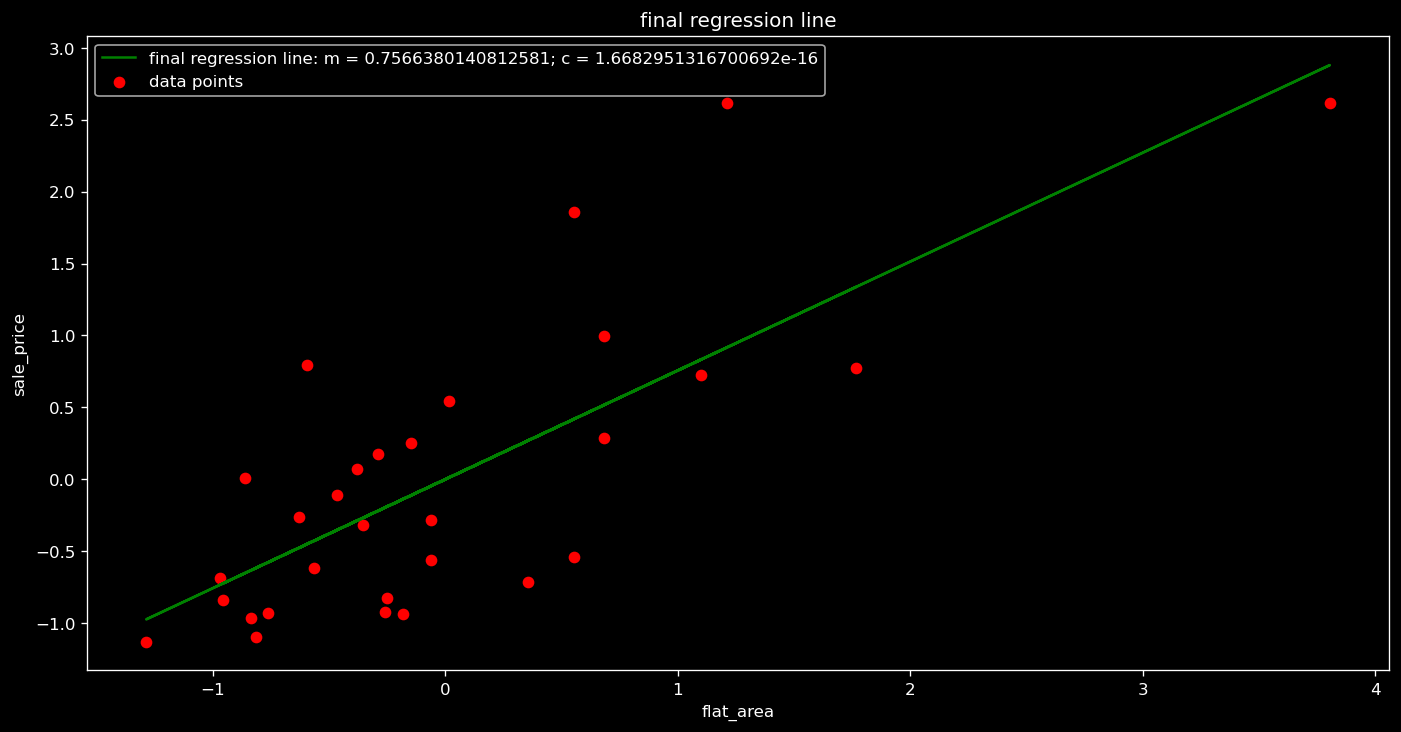

In [74]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)